In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv("C:/Users/C5295630/Documents/DataScience/Assignment/Linear Regretion/delivery_time.csv")

In [4]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
data.shape

(21, 2)

In [6]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
data[data.duplicated()].shape

(0, 2)

In [9]:
data= data.drop_duplicates()
data.shape

(21, 2)

array([[<AxesSubplot:title={'center':'Delivery Time'}>,
        <AxesSubplot:title={'center':'Sorting Time'}>]], dtype=object)

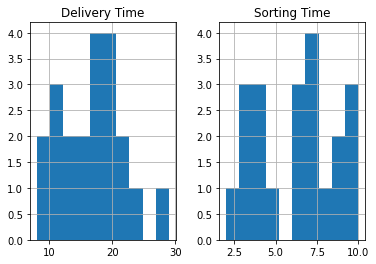

In [10]:
data.hist()

<AxesSubplot:>

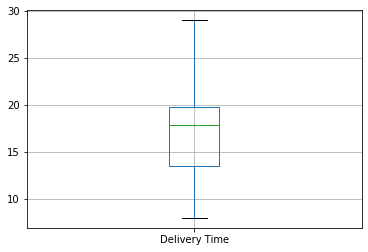

In [11]:
data.boxplot(column=['Delivery Time'])

<AxesSubplot:>

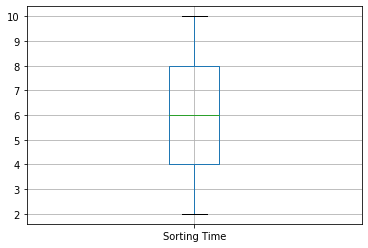

In [12]:
data.boxplot(column=['Sorting Time'])

In [13]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:>

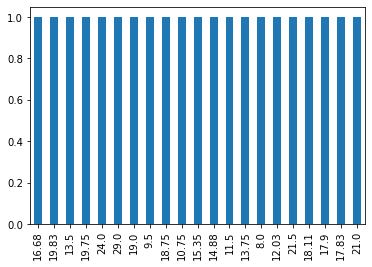

In [14]:
data['Delivery Time'].value_counts().plot.bar()

<AxesSubplot:xlabel='Delivery Time,Sorting Time'>

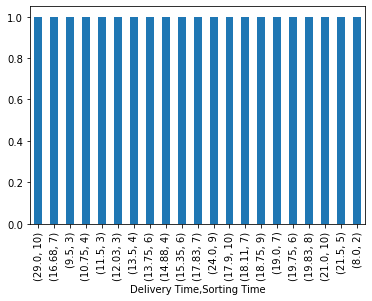

In [15]:
data.value_counts().plot.bar()

In [16]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\C5295630\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

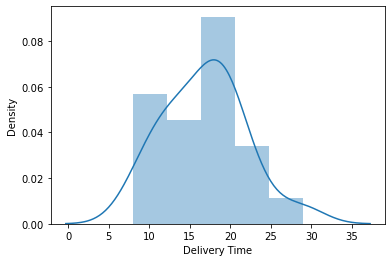

In [17]:
sns.distplot(data['Delivery Time'])

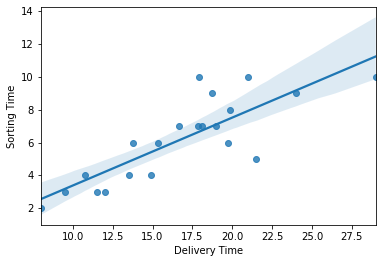

<Figure size 432x288 with 0 Axes>

In [18]:
sns.regplot(x="Delivery Time", y="Sorting Time", data=data);
fig=plt.figure()

In [19]:
import statsmodels.formula.api as smf

In [20]:
model = smf.ols("data['Sorting Time']~ data['Delivery Time']",data = data).fit()
model

In [21]:
model.params

Intercept               -0.756673
data['Delivery Time']    0.413744
dtype: float64

In [22]:
print(model.tvalues, '\n', model.pvalues)

Intercept               -0.667290
data['Delivery Time']    6.387447
dtype: float64 
 Intercept                0.512611
data['Delivery Time']    0.000004
dtype: float64


In [23]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     data['Sorting Time']   R-squared:                       0.682
Model:                              OLS   Adj. R-squared:                  0.666
Method:                   Least Squares   F-statistic:                     40.80
Date:                  Mon, 19 Apr 2021   Prob (F-statistic):           3.98e-06
Time:                          09:49:40   Log-Likelihood:                -36.839
No. Observations:                    21   AIC:                             77.68
Df Residuals:                        19   BIC:                             79.77
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.7567      1.134     -0.667      0.513      -3.130       1.617
data['Delivery Time']     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\C5295630\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\C5295630\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


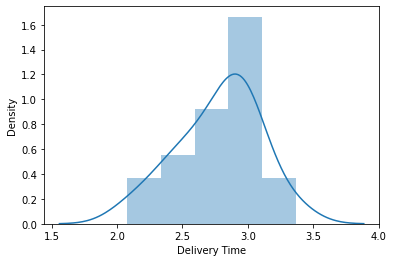

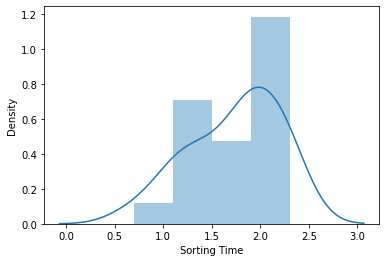

<Figure size 432x288 with 0 Axes>

In [25]:
data1=data
data1['Delivery Time']= np.log(data['Delivery Time'])
data1['Sorting Time']= np.log(data['Sorting Time'])
sns.distplot(data1['Delivery Time'])
fig=plt.figure()
sns.distplot(data1['Sorting Time'])
fig=plt.figure()

In [26]:
model2 = smf.ols("data1['Sorting Time']~data1['Delivery Time']",data=data1).fit()

In [27]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     data1['Sorting Time']   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Mon, 19 Apr 2021   Prob (F-statistic):           1.60e-07
Time:                           09:49:41   Log-Likelihood:                 2.1913
No. Observations:                     21   AIC:                           -0.3826
Df Residuals:                         19   BIC:                             1.706
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.8573      0.450     -4.131      0.001      -2.798      -0.916
data1['Delivery Time']     1.2923      0.161      8.024      0.000       0.955       1.629
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.258
Skew:                          -0.192   Prob(JB):                        0.879
Kurtosis:                       2.617   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\C5295630\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\C5295630\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


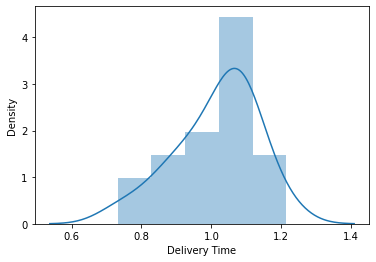

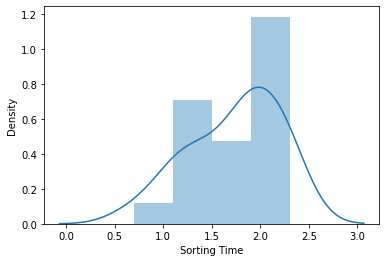

<Figure size 432x288 with 0 Axes>

In [28]:
data2=data
data1['Delivery Time']= np.log(data['Delivery Time'])
sns.distplot(data2['Delivery Time'])
fig=plt.figure()
sns.distplot(data2['Sorting Time'])
fig=plt.figure()

In [29]:
model3= smf.ols("data2['Sorting Time']~data2['Delivery Time']",data=data2).fit()

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     data['Sorting Time']   R-squared:                       0.682
Model:                              OLS   Adj. R-squared:                  0.666
Method:                   Least Squares   F-statistic:                     40.80
Date:                  Mon, 19 Apr 2021   Prob (F-statistic):           3.98e-06
Time:                          09:51:13   Log-Likelihood:                -36.839
No. Observations:                    21   AIC:                             77.68
Df Residuals:                        19   BIC:                             79.77
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.7567      1.134     -0.667      0.513      -3.130       1.617
data['Delivery Time']     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\C5295630\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\C5295630\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


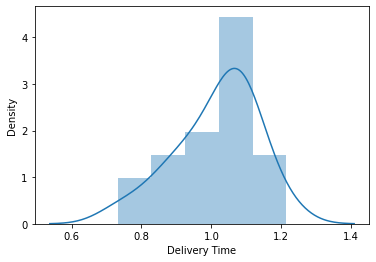

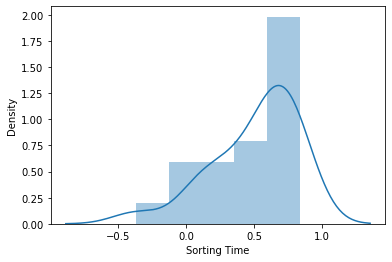

<Figure size 432x288 with 0 Axes>

In [31]:
data3=data
data1['Sorting Time']= np.log(data['Sorting Time'])
sns.distplot(data3['Delivery Time'])
fig=plt.figure()
sns.distplot(data3['Sorting Time'])
fig=plt.figure()

In [32]:
model4= smf.ols("data3['Sorting Time']~data3['Delivery Time']",data=data3).fit()

In [33]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     data3['Sorting Time']   R-squared:                       0.803
Model:                               OLS   Adj. R-squared:                  0.792
Method:                    Least Squares   F-statistic:                     77.21
Date:                   Mon, 19 Apr 2021   Prob (F-statistic):           4.05e-08
Time:                           09:52:36   Log-Likelihood:                 11.820
No. Observations:                     21   AIC:                            -19.64
Df Residuals:                         19   BIC:                            -17.55
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.9199      0.278     -6.913      0.000      -2.501      -1.339
data3['Delivery Time']     2.3908      0.272      8.787      0.000       1.821       2.960
==============================================================================
Omnibus:                        1.317   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.518   Jarque-Bera (JB):                0.968
Skew:                          -0.237   Prob(JB):                        0.616
Kurtosis:                       2.061   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\C5295630\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\C5295630\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


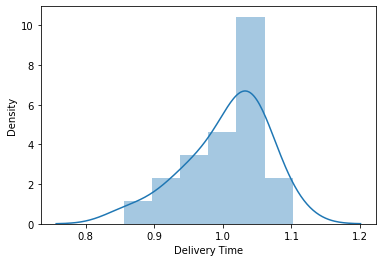

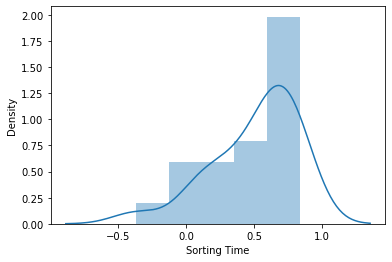

<Figure size 432x288 with 0 Axes>

In [34]:
data4=data
data1['Delivery Time']= np.sqrt(data['Delivery Time'])
sns.distplot(data4['Delivery Time'])
fig=plt.figure()
sns.distplot(data4['Sorting Time'])
fig=plt.figure()

In [35]:
model5= smf.ols("data4['Sorting Time']~data4['Delivery Time']",data=data4).fit()

In [36]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     data4['Sorting Time']   R-squared:                       0.814
Model:                               OLS   Adj. R-squared:                  0.804
Method:                    Least Squares   F-statistic:                     83.15
Date:                   Mon, 19 Apr 2021   Prob (F-statistic):           2.28e-08
Time:                           09:54:34   Log-Likelihood:                 12.449
No. Observations:                     21   AIC:                            -20.90
Df Residuals:                         19   BIC:                            -18.81
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -4.2492      0.522     -8.137      0.000      -5.342      -3.156
data4['Delivery Time']     4.7289      0.519      9.118      0.000       3.643       5.814
==============================================================================
Omnibus:                        1.176   Durbin-Watson:                   1.442
Prob(Omnibus):                  0.555   Jarque-Bera (JB):                0.913
Skew:                          -0.228   Prob(JB):                        0.634
Kurtosis:                       2.086   Cond. No.                         34.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
new_data=pd.Series([10,4,6,9,10,6,7,3,10,9,8,4,7,3,3,4,6,7,2,7,5])

In [40]:
pred_data=pd.DataFrame(new_data,columns=['Sorting Time'])

In [47]:
model5.predict(pred_data)

0     0.740452
1     0.375762
2     0.694610
3     0.835730
4     0.961363
5     0.490772
6     0.664979
7     0.010711
8     0.618198
9     0.654710
10    0.697672
11    0.148774
12    0.560952
13    0.219396
14    0.264903
15    0.463681
16    0.392715
17    0.627458
18   -0.203069
19    0.615075
20    0.757674
dtype: float64